Name: Pratham Shewale Roll_no: TEBD22618

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

170498071/170498071 [==============================] - 227s 1us/step
Epoch 1/20
782/782 [==============================] - 27s 33ms/step - loss: 1.7760 - accuracy: 0.3375 - val_loss: 1.3768 - val_accuracy: 0.4948
Epoch 2/20
782/782 [==============================] - 26s 34ms/step - loss: 1.4709 - accuracy: 0.4692 - val_loss: 1.2488 - val_accuracy: 0.5460
Epoch 3/20
782/782 [==============================] - 27s 34ms/step - loss: 1.3507 - accuracy: 0.5171 - val_loss: 1.1974 - val_accuracy: 0.5684
Epoch 4/20
782/782 [==============================] - 26s 34ms/step - loss: 1.2787 - accuracy: 0.5444 - val_loss: 1.1059 - val_accuracy: 0.6103
Epoch 5/20
782/782 [==============================] - 28s 35ms/step - loss: 1.2146 - accuracy: 0.5667 - val_loss: 1.0326 - val_accuracy: 0.6304
Epoch 6/20
782/782 [==============================] - 28s 36ms/step - loss: 1.1668 - accuracy: 0.5855 - val_loss: 1.0368 - val_accuracy: 0.6395
Epoch 7/20
782/782 [==============================] - 30s 38ms/step

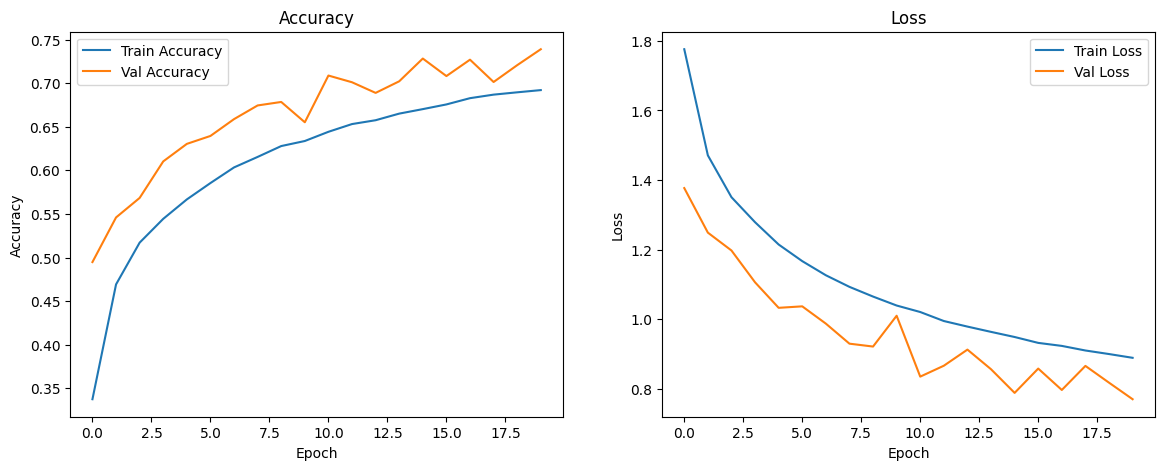

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten labels (no one-hot needed for sparse categorical loss)
y_train, y_test = y_train.flatten(), y_test.flatten()

# Model creation function
def create_model(dropout_rate=0.3):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Create and train the model
model = create_model(dropout_rate=0.3)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test))

# Plotting function
def plot_metrics(history, title_suffix=''):
    plt.figure(figsize=(14, 5))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy' + title_suffix)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss' + title_suffix)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Call plot function
plot_metrics(history)
